<a href="https://colab.research.google.com/github/reza-pishva/RNN-projects/blob/main/clustering_main_trans_g11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.losses import mse
from sklearn.decomposition import PCA
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
import warnings # Ignore specific warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_excel('output_main_trans_g11.xlsx')

In [3]:
df1.head(10)

,AssetID_8312,AssetID_8313,AssetID_8314,date
0,65.0,61.0,7.0,2021-03-20 19:53:17
1,64.0,60.0,7.0,2021-03-21 02:03:46
2,72.0,66.0,7.0,2021-03-21 08:08:17
3,67.0,62.0,7.0,2021-03-21 13:45:47
4,70.0,64.0,7.0,2021-03-21 20:15:08
5,68.0,62.0,7.0,2021-03-22 00:37:54
6,67.0,62.0,7.0,2021-03-22 06:47:22
7,67.0,63.0,7.0,2021-03-22 12:49:25
8,63.0,58.0,7.0,2021-03-22 18:58:29
9,63.0,58.0,7.0,2021-03-23 00:46:12


In [4]:
df1.columns

Index(['AssetID_8312', 'AssetID_8313', 'AssetID_8314', 'date'], dtype='object')

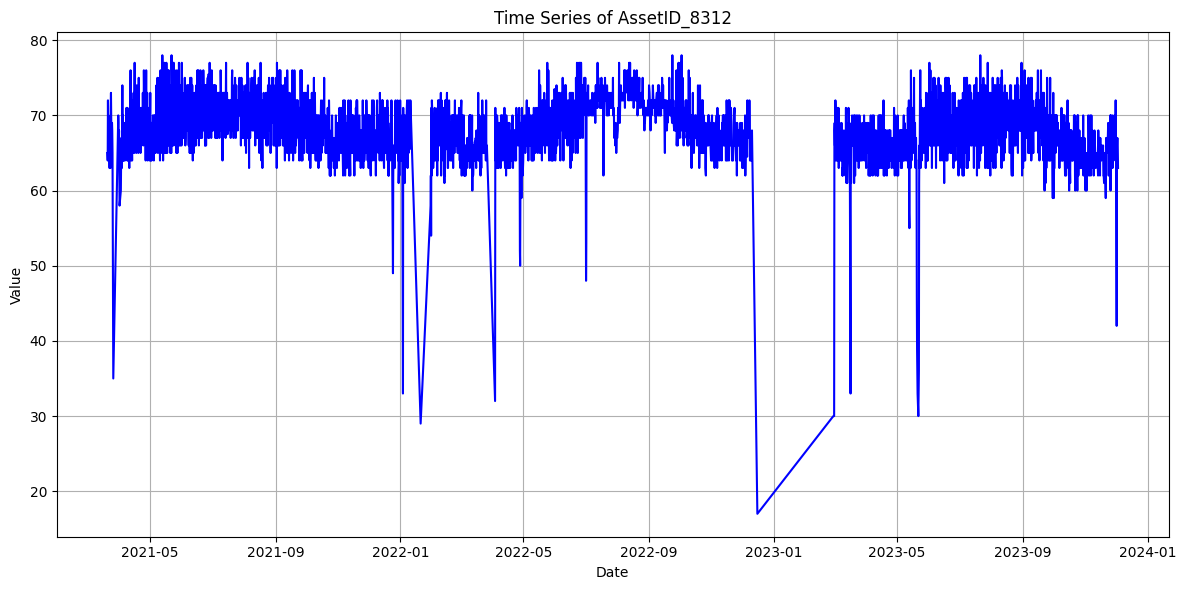

In [5]:
# تبدیل ستون تاریخ به datetime
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# رسم نمودار برای AssetID_8312
plt.figure(figsize=(12, 6))
plt.plot(df1['date'], df1['AssetID_8312'], color='blue')
plt.title('Time Series of AssetID_8312')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

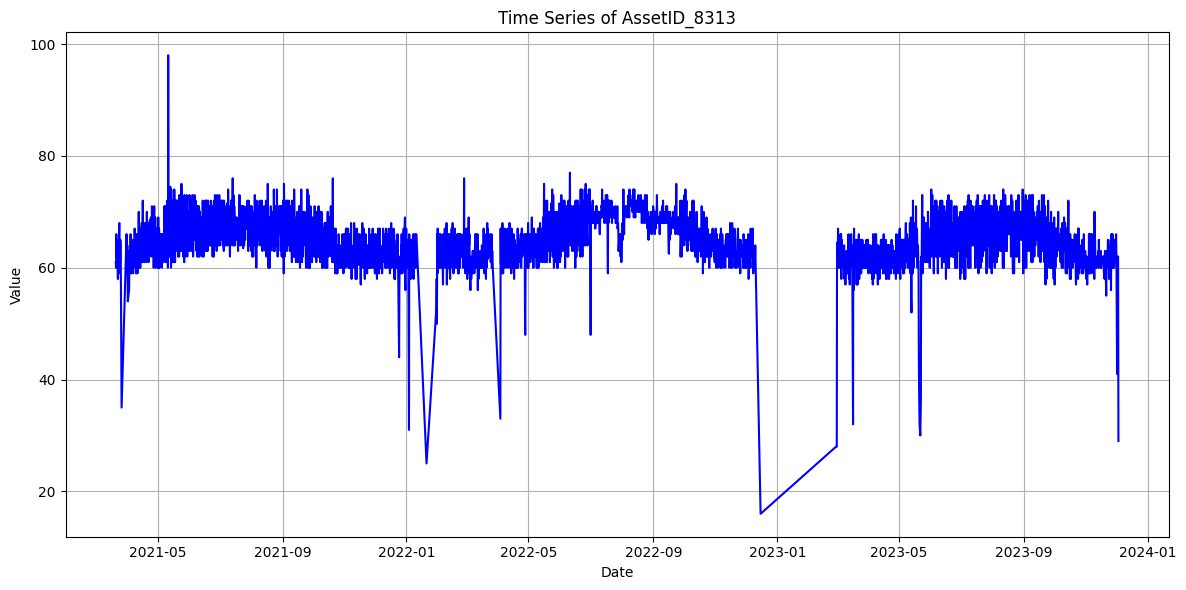

In [6]:
# تبدیل ستون تاریخ به datetime
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# رسم نمودار برای AssetID_8312
plt.figure(figsize=(12, 6))
plt.plot(df1['date'], df1['AssetID_8313'], color='blue')
plt.title('Time Series of AssetID_8313')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

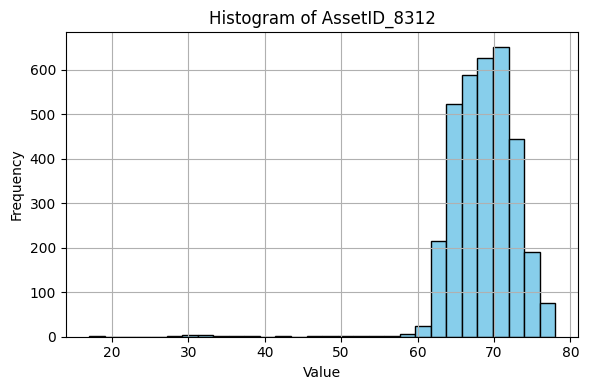

In [7]:
# رسم هیستوگرام برای AssetID_8312
plt.figure(figsize=(6, 4))
plt.hist(df1['AssetID_8312'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of AssetID_8312')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


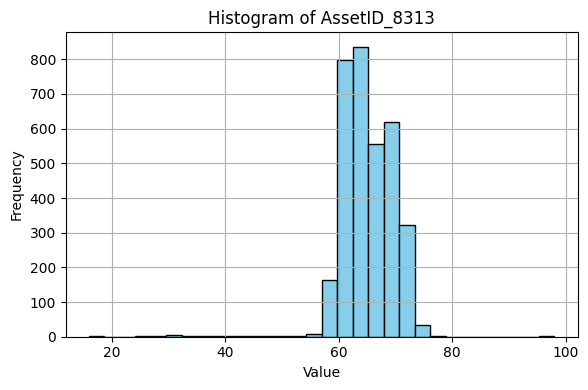

In [8]:
# رسم هیستوگرام برای AssetID_8313
plt.figure(figsize=(6, 4))
plt.hist(df1['AssetID_8313'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of AssetID_8313')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

# انتخاب ستون‌ها برای استانداردسازی
data_to_scale = df1[['AssetID_8312', 'AssetID_8313']]

# استانداردسازی داده‌ها
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# تبدیل خروجی به دیتافریم با همان نام ستون‌ها
scaled_df = pd.DataFrame(scaled_data, columns=['AssetID_8312', 'AssetID_8313'])

# نمایش ۵ ردیف اول
print(scaled_df.head())


   AssetID_8312  AssetID_8313
0     -0.764542     -0.860483
1     -0.998192     -1.077337
2      0.871012      0.223786
3     -0.297241     -0.643629
4      0.403711     -0.209922


In [10]:
scaled_df_clean = scaled_df.dropna()

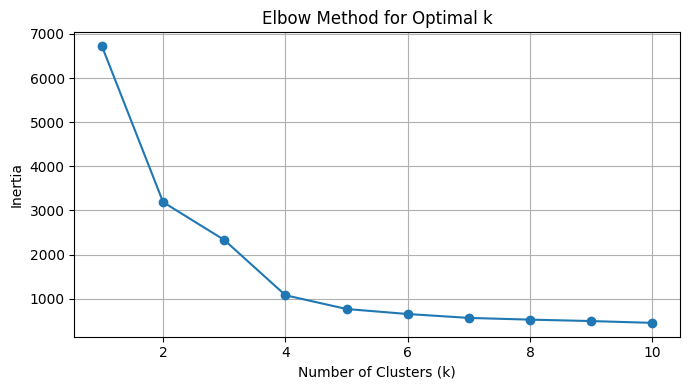

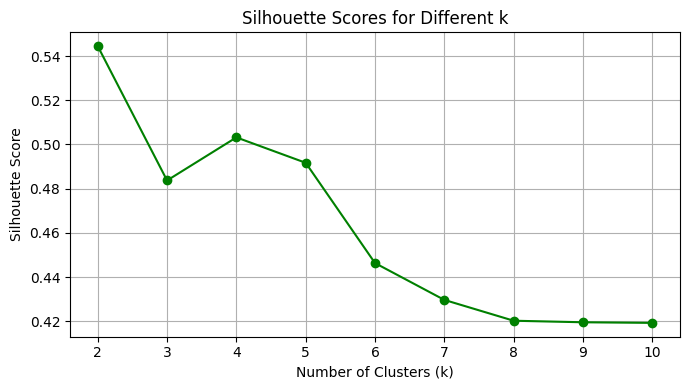

In [11]:
X = scaled_df_clean[['AssetID_8312', 'AssetID_8313']]

# Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Silhouette Scores
silhouette_scores = []
k_range_sil = range(2, 11)
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(7, 4))
plt.plot(k_range_sil, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


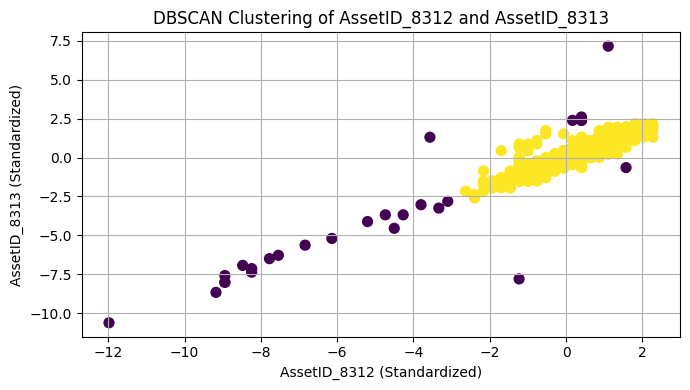

In [12]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.7, min_samples=5)
labels = dbscan.fit_predict(scaled_df_clean)

# اضافه کردن برچسب خوشه به دیتافریم
scaled_df_clean['cluster'] = labels

# رسم نتایج خوشه‌بندی
plt.figure(figsize=(7, 4))
plt.scatter(scaled_df_clean['AssetID_8312'], scaled_df_clean['AssetID_8313'], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering of AssetID_8312 and AssetID_8313')
plt.xlabel('AssetID_8312 (Standardized)')
plt.ylabel('AssetID_8313 (Standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# حذف نقاط پرت (برچسب -1)
mask = scaled_df_clean['cluster'] != -1
X_clustered = scaled_df_clean.loc[mask, ['AssetID_8312', 'AssetID_8313']]
labels_clustered = scaled_df_clean.loc[mask, 'cluster']

# Check if there are at least 2 clusters after removing noise
if len(np.unique(labels_clustered)) >= 2:
    # محاسبه امتیاز سیلوئت برای هر نمونه
    silhouette_vals = silhouette_samples(X_clustered, labels_clustered)
    avg_score = silhouette_score(X_clustered, labels_clustered)

    # رسم نمودار سیلوئت
    plt.figure(figsize=(7, 4))
    y_lower = 10
    for i in np.unique(labels_clustered):
        ith_cluster_silhouette_vals = silhouette_vals[labels_clustered == i]
        ith_cluster_silhouette_vals.sort()
        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_vals,
                          alpha=0.7, label=f'Cluster {i}')

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(avg_score, color="red", linestyle="--", label=f"Average Silhouette = {avg_score:.2f}")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster Label")
    plt.title("Silhouette Plot for DBSCAN Clustering")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Average Silhouette Score for DBSCAN (excluding noise): {avg_score:.2f}")
else:
    print("DBSCAN resulted in only one cluster (excluding noise points). Silhouette score cannot be calculated.")

DBSCAN resulted in only one cluster (excluding noise points). Silhouette score cannot be calculated.


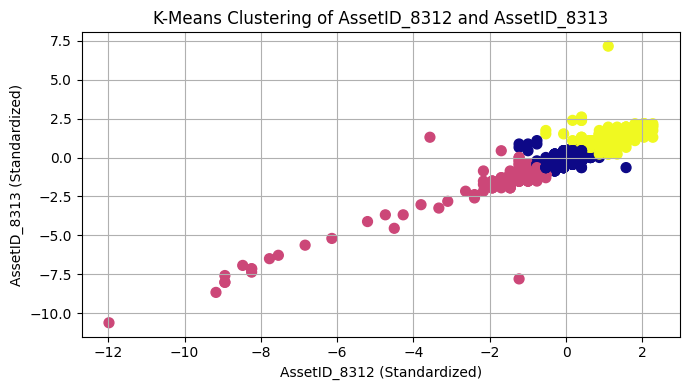

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# اجرای K-Means با 3 خوشه (قابل تنظیم)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# اضافه کردن برچسب خوشه به دیتافریم
scaled_df_clean['kmeans_cluster'] = kmeans_labels

# رسم نتایج خوشه‌بندی
plt.figure(figsize=(7, 4))
plt.scatter(
    scaled_df_clean['AssetID_8312'],
    scaled_df_clean['AssetID_8313'],
    c=kmeans_labels,
    cmap='plasma',
    s=50
)
plt.title('K-Means Clustering of AssetID_8312 and AssetID_8313')
plt.xlabel('AssetID_8312 (Standardized)')
plt.ylabel('AssetID_8313 (Standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()


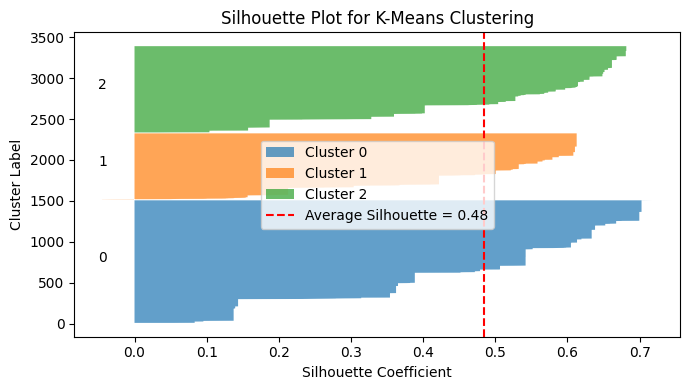

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# داده‌های ورودی و برچسب‌ها
X_kmeans = scaled_df_clean[['AssetID_8312', 'AssetID_8313']]
labels_kmeans = scaled_df_clean['kmeans_cluster']

# محاسبه امتیاز سیلوئت برای هر نمونه
silhouette_vals = silhouette_samples(X_kmeans, labels_kmeans)
avg_score = silhouette_score(X_kmeans, labels_kmeans)

# رسم نمودار
plt.figure(figsize=(7, 4))
y_lower = 10
for i in np.unique(labels_kmeans):
    ith_cluster_silhouette_vals = silhouette_vals[labels_kmeans == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      alpha=0.7, label=f'Cluster {i}')

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(avg_score, color="red", linestyle="--", label=f"Average Silhouette = {avg_score:.2f}")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for K-Means Clustering")
plt.legend()
plt.tight_layout()
plt.show()


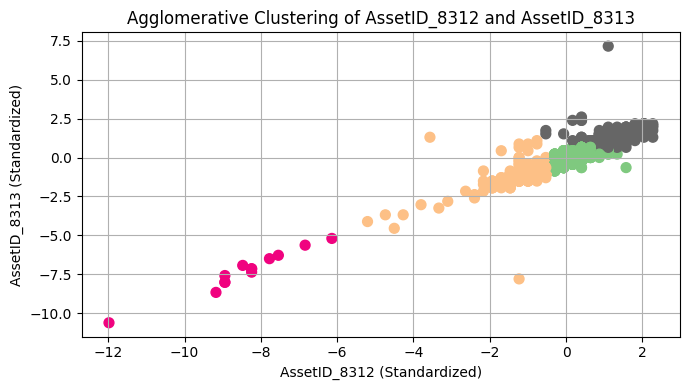

In [16]:
# اجرای خوشه‌بندی سلسله‌مراتبی با 3 خوشه (قابل تنظیم)
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# اضافه کردن برچسب خوشه به دیتافریم
scaled_df_clean['agglo_cluster'] = agglo_labels

# رسم نتایج خوشه‌بندی
plt.figure(figsize=(7, 4))
plt.scatter(
    scaled_df_clean['AssetID_8312'],
    scaled_df_clean['AssetID_8313'],
    c=agglo_labels,
    cmap='Accent',
    s=50
)
plt.title('Agglomerative Clustering of AssetID_8312 and AssetID_8313')
plt.xlabel('AssetID_8312 (Standardized)')
plt.ylabel('AssetID_8313 (Standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()


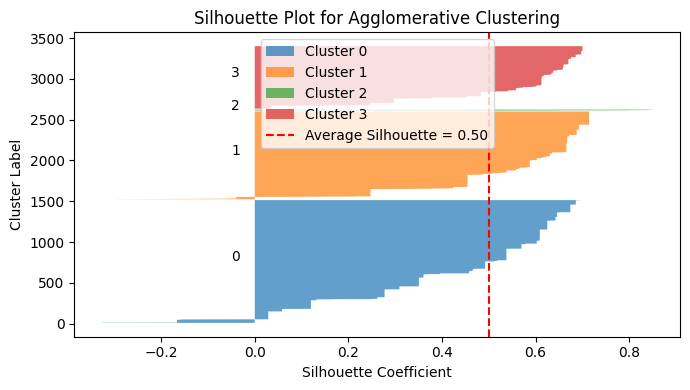

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# داده‌های ورودی و برچسب‌ها
X_agglo = scaled_df_clean[['AssetID_8312', 'AssetID_8313']]
labels_agglo = scaled_df_clean['agglo_cluster']

# محاسبه امتیاز سیلوئت برای هر نمونه
silhouette_vals = silhouette_samples(X_agglo, labels_agglo)
avg_score = silhouette_score(X_agglo, labels_agglo)

# رسم نمودار
plt.figure(figsize=(7, 4))
y_lower = 10
for i in np.unique(labels_agglo):
    ith_cluster_silhouette_vals = silhouette_vals[labels_agglo == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      alpha=0.7, label=f'Cluster {i}')

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(avg_score, color="red", linestyle="--", label=f"Average Silhouette = {avg_score:.2f}")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for Agglomerative Clustering")
plt.legend()
plt.tight_layout()
plt.show()


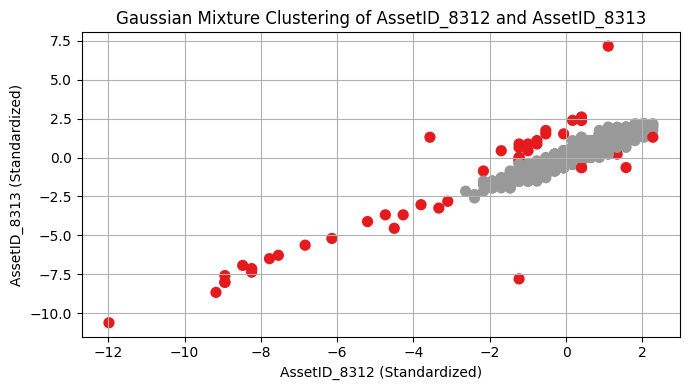

In [18]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# اجرای GMM با 3 خوشه (قابل تنظیم)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# اضافه کردن برچسب خوشه به دیتافریم
scaled_df_clean['gmm_cluster'] = gmm_labels

# رسم نتایج خوشه‌بندی
plt.figure(figsize=(7, 4))
plt.scatter(
    scaled_df_clean['AssetID_8312'],
    scaled_df_clean['AssetID_8313'],
    c=gmm_labels,
    cmap='Set1',
    s=50
)
plt.title('Gaussian Mixture Clustering of AssetID_8312 and AssetID_8313')
plt.xlabel('AssetID_8312 (Standardized)')
plt.ylabel('AssetID_8313 (Standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()


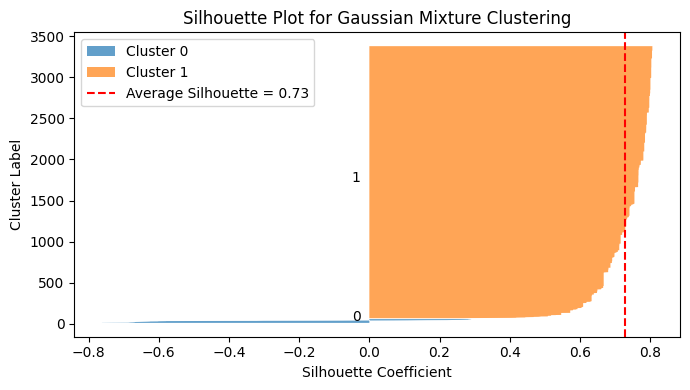

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# داده‌های ورودی و برچسب‌ها
X_gmm = scaled_df_clean[['AssetID_8312', 'AssetID_8313']]
labels_gmm = scaled_df_clean['gmm_cluster']

# محاسبه امتیاز سیلوئت برای هر نمونه
silhouette_vals = silhouette_samples(X_gmm, labels_gmm)
avg_score = silhouette_score(X_gmm, labels_gmm)

# رسم نمودار
plt.figure(figsize=(7, 4))
y_lower = 10
for i in np.unique(labels_gmm):
    ith_cluster_silhouette_vals = silhouette_vals[labels_gmm == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      alpha=0.7, label=f'Cluster {i}')

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(avg_score, color="red", linestyle="--", label=f"Average Silhouette = {avg_score:.2f}")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for Gaussian Mixture Clustering")
plt.legend()
plt.tight_layout()
plt.show()


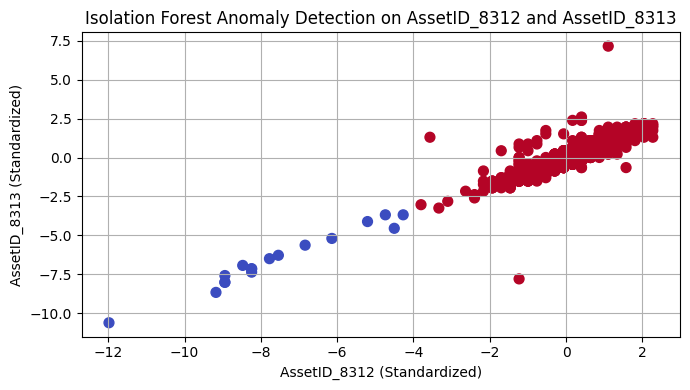

In [30]:
# آموزش مدل Isolation Forest روی دو ویژگی انتخاب‌شده
iso_forest = IsolationForest(contamination=0.005, random_state=42)
anomaly_labels = iso_forest.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# اضافه کردن برچسب ناهنجاری به دیتافریم
# برچسب‌ها: 1 = نرمال، -1 = ناهنجار
scaled_df_clean['anomaly_label'] = anomaly_labels

# رسم نتایج تشخیص ناهنجاری
plt.figure(figsize=(7, 4))
plt.scatter(
    scaled_df_clean['AssetID_8312'],
    scaled_df_clean['AssetID_8313'],
    c=anomaly_labels,
    cmap='coolwarm',
    s=50
)
plt.title('Isolation Forest Anomaly Detection on AssetID_8312 and AssetID_8313')
plt.xlabel('AssetID_8312 (Standardized)')
plt.ylabel('AssetID_8313 (Standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
# شمارش تعداد موارد نرمال و غیرنرمال
counts = scaled_df_clean['anomaly_label'].value_counts()

# نمایش نتایج
print("تعداد موارد نرمال (label = 1):", counts.get(1, 0))
print("تعداد موارد غیرنرمال (label = -1):", counts.get(-1, 0))


تعداد موارد نرمال (label = 1): 3344
تعداد موارد غیرنرمال (label = -1): 17


In [33]:
# فرض بر این است که original_df شامل داده‌های اصلی قبل از نرمال‌سازی است
# و ایندکس آن با scaled_df_clean هم‌راستا است

# اضافه کردن برچسب ناهنجاری به دیتافریم اصلی
df1['anomaly_label'] = scaled_df_clean['anomaly_label']

# انتخاب ۱۰ نمونه تصادفی از داده‌ها
sample_df = df1[['AssetID_8312', 'AssetID_8313', 'anomaly_label']].sample(n=10, random_state=42)

# نمایش نتایج
print("نمونه‌ای از داده‌های اصلی همراه با وضعیت ناهنجاری:")
print(sample_df)


نمونه‌ای از داده‌های اصلی همراه با وضعیت ناهنجاری:
      AssetID_8312  AssetID_8313  anomaly_label
1116          64.0          60.0            1.0
2358          63.0          59.0            1.0
807           65.0          63.0            1.0
2700          63.0          59.0            1.0
196           76.0          72.0            1.0
2628          65.0          62.0            1.0
3011          64.0          61.0            1.0
1807          69.0          66.0            1.0
2564          64.0          61.0            1.0
2010          67.0          65.0            1.0


In [37]:
# فرض بر این است که original_df شامل داده‌های اصلی قبل از نرمال‌سازی است
# و ایندکس آن با scaled_df_clean هم‌راستا است

# اضافه کردن برچسب ناهنجاری به دیتافریم اصلی
df1['anomaly_label'] = scaled_df_clean['anomaly_label']

# تبدیل برچسب‌های عددی به متنی
df1['anomaly_status'] = df1['anomaly_label'].map({1: 'normal', -1: 'abnormal'})

# انتخاب حداقل یک نمونه abnormal
abnormal_sample = df1[df1['anomaly_label'] == -1][['AssetID_8312', 'AssetID_8313', 'anomaly_status']].sample(n=1, random_state=42)

# انتخاب ۹ نمونه normal
normal_sample = df1[df1['anomaly_label'] == 1][['AssetID_8312', 'AssetID_8313', 'anomaly_status']].sample(n=9, random_state=24)

# ترکیب و نمایش ۱۰ نمونه
final_sample = pd.concat([abnormal_sample, normal_sample]).reset_index(drop=True)

print("نمونه‌ای از داده‌های اصلی همراه با وضعیت ناهنجاری :")
print(final_sample)


نمونه‌ای از داده‌های اصلی همراه با وضعیت ناهنجاری :
   AssetID_8312  AssetID_8313 anomaly_status
0          35.0          35.0       abnormal
1          74.0          70.0         normal
2          70.0          67.0         normal
3          66.0          63.0         normal
4          76.0          72.0         normal
5          63.0          60.0         normal
6          68.0          64.0         normal
7          66.0          62.0         normal
8          65.0          61.0         normal
9          67.0          64.0         normal


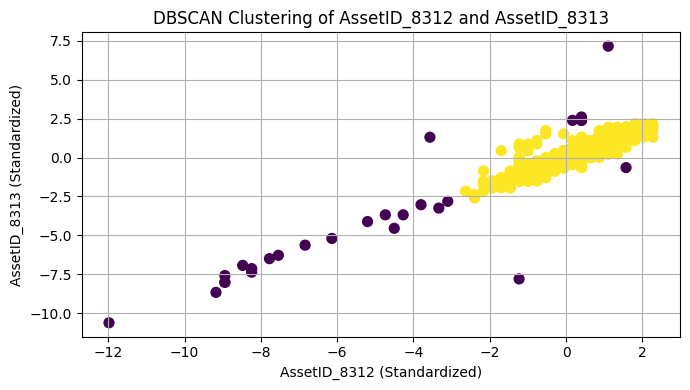

تعداد موارد نرمال: 3333
تعداد موارد غیرنرمال: 28

نمونه‌ای از داده‌های اصلی همراه با وضعیت خوشه‌بندی (حداقل دو مورد abnormal):
   AssetID_8312  AssetID_8313 cluster_status
0          32.0          33.0       abnormal
1          36.0          36.0       abnormal
2          73.0          69.0         normal
3          70.0          67.0         normal
4          66.0          63.0         normal
5          70.0          65.5         normal
6          71.0          68.0         normal
7          67.0          64.0         normal
8          72.0          72.0         normal
9          62.0          59.0         normal


In [38]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.7, min_samples=5)
labels = dbscan.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# اضافه کردن برچسب خوشه به دیتافریم
scaled_df_clean['cluster'] = labels

# تبدیل برچسب‌ها به وضعیت نرمال/غیرنرمال
scaled_df_clean['cluster_status'] = scaled_df_clean['cluster'].map(lambda x: 'abnormal' if x == -1 else 'normal')

# رسم نتایج خوشه‌بندی
plt.figure(figsize=(7, 4))
plt.scatter(
    scaled_df_clean['AssetID_8312'],
    scaled_df_clean['AssetID_8313'],
    c=labels,
    cmap='viridis',
    s=50
)
plt.title('DBSCAN Clustering of AssetID_8312 and AssetID_8313')
plt.xlabel('AssetID_8312 (Standardized)')
plt.ylabel('AssetID_8313 (Standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()

# محاسبه تعداد موارد نرمال و غیرنرمال
status_counts = scaled_df_clean['cluster_status'].value_counts()
print("تعداد موارد نرمال:", status_counts.get('normal', 0))
print("تعداد موارد غیرنرمال:", status_counts.get('abnormal', 0))

# فرض بر این است که df1 شامل داده‌های اصلی قبل از نرمال‌سازی است و ایندکس‌ها هم‌راستا هستند
df1['cluster_status'] = scaled_df_clean['cluster_status']

# انتخاب حداقل ۲ مورد abnormal و ۸ مورد normal
abnormal_samples = df1[df1['cluster_status'] == 'abnormal'][['AssetID_8312', 'AssetID_8313', 'cluster_status']].sample(n=2, random_state=42)
normal_samples = df1[df1['cluster_status'] == 'normal'][['AssetID_8312', 'AssetID_8313', 'cluster_status']].sample(n=8, random_state=24)

# ترکیب و نمایش ۱۰ نمونه
final_samples = pd.concat([abnormal_samples, normal_samples]).reset_index(drop=True)
print("\nنمونه‌ای از داده‌های اصلی همراه با وضعیت خوشه‌بندی (حداقل دو مورد abnormal):")
print(final_samples)


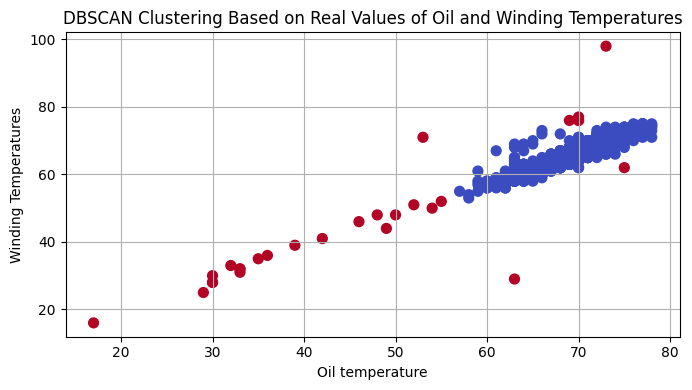

تعداد موارد نرمال: 3333
تعداد موارد غیرنرمال: 28

نمونه‌ای از داده‌های واقعی همراه با وضعیت خوشه‌بندی (حداقل دو مورد abnormal):
   AssetID_8312  AssetID_8313 cluster_status
0          32.0          33.0       abnormal
1          36.0          36.0       abnormal
2          73.0          69.0         normal
3          70.0          67.0         normal
4          66.0          63.0         normal
5          70.0          65.5         normal
6          71.0          68.0         normal
7          67.0          64.0         normal
8          72.0          72.0         normal
9          62.0          59.0         normal


In [40]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.7, min_samples=5)
labels = dbscan.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# اضافه کردن برچسب خوشه به دیتافریم استانداردشده
scaled_df_clean['cluster'] = labels
scaled_df_clean['cluster_status'] = scaled_df_clean['cluster'].map(lambda x: 'abnormal' if x == -1 else 'normal')

# انتقال برچسب‌ها به دیتافریم اصلی (مقادیر واقعی)
df1['cluster_status'] = scaled_df_clean['cluster_status']

# رسم نمودار با مقادیر واقعی و برچسب‌های نرمال/غیرنرمال
plt.figure(figsize=(7, 4))
plt.scatter(
    df1['AssetID_8312'],  # دمای روغن ترانس
    df1['AssetID_8313'],  # دمای سیم‌پیچ ترانس
    c=df1['cluster_status'].map({'normal': 0, 'abnormal': 1}),
    cmap='coolwarm',
    s=50
)
plt.title('DBSCAN Clustering Based on Real Values of Oil and Winding Temperatures')
plt.xlabel('Oil temperature')
plt.ylabel('Winding Temperatures')
plt.grid(True)
plt.tight_layout()
plt.show()

# محاسبه تعداد موارد نرمال و غیرنرمال
status_counts = df1['cluster_status'].value_counts()
print("تعداد موارد نرمال:", status_counts.get('normal', 0))
print("تعداد موارد غیرنرمال:", status_counts.get('abnormal', 0))

# انتخاب حداقل ۲ مورد abnormal و ۸ مورد normal
abnormal_samples = df1[df1['cluster_status'] == 'abnormal'][['AssetID_8312', 'AssetID_8313', 'cluster_status']].sample(n=2, random_state=42)
normal_samples = df1[df1['cluster_status'] == 'normal'][['AssetID_8312', 'AssetID_8313', 'cluster_status']].sample(n=8, random_state=24)

# ترکیب و نمایش ۱۰ نمونه
final_samples = pd.concat([abnormal_samples, normal_samples]).reset_index(drop=True)
print("\nنمونه‌ای از داده‌های واقعی همراه با وضعیت خوشه‌بندی (حداقل دو مورد abnormal):")
print(final_samples)


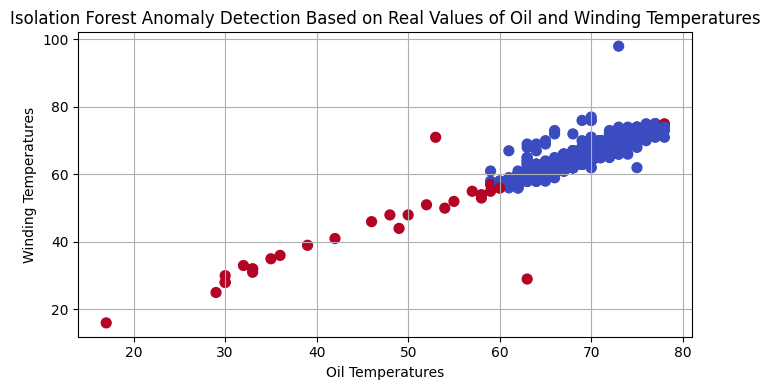

تعداد موارد نرمال: 3329
تعداد موارد غیرنرمال: 32

نمونه‌ای از داده‌های واقعی همراه با وضعیت ناهنجاری (حداقل دو مورد abnormal):
   AssetID_8312  AssetID_8313 anomaly_status
0          60.0          56.0       abnormal
1          78.0          75.0       abnormal
2          65.0          62.0         normal
3          70.0          66.0         normal
4          71.0          68.5         normal
5          69.0          65.5         normal
6          71.0          70.0         normal
7          65.0          62.0         normal
8          63.0          60.0         normal
9          65.0          61.0         normal


In [46]:
# اجرای Isolation Forest روی داده‌های استانداردشده
iso_forest = IsolationForest(contamination=0.010, random_state=42)
labels = iso_forest.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# اضافه کردن برچسب ناهنجاری به دیتافریم استانداردشده
scaled_df_clean['anomaly_label'] = labels
scaled_df_clean['anomaly_status'] = scaled_df_clean['anomaly_label'].map({1: 'normal', -1: 'abnormal'})

# انتقال برچسب‌ها به دیتافریم اصلی (مقادیر واقعی)
df1['anomaly_status'] = scaled_df_clean['anomaly_status']

# رسم نمودار با مقادیر واقعی و برچسب‌های نرمال/غیرنرمال
plt.figure(figsize=(7, 4))
plt.scatter(
    df1['AssetID_8312'],  # دمای روغن ترانس
    df1['AssetID_8313'],  # دمای سیم‌پیچ ترانس
    c=df1['anomaly_status'].map({'normal': 0, 'abnormal': 1}),
    cmap='coolwarm',
    s=50
)
plt.title('Isolation Forest Anomaly Detection Based on Real Values of Oil and Winding Temperatures')
plt.xlabel('Oil Temperatures')
plt.ylabel('Winding Temperatures')
plt.grid(True)
plt.tight_layout()
plt.show()

# محاسبه تعداد موارد نرمال و غیرنرمال
status_counts = df1['anomaly_status'].value_counts()
print("تعداد موارد نرمال:", status_counts.get('normal', 0))
print("تعداد موارد غیرنرمال:", status_counts.get('abnormal', 0))

# انتخاب حداقل ۲ مورد abnormal و ۸ مورد normal
abnormal_samples = df1[df1['anomaly_status'] == 'abnormal'][['AssetID_8312', 'AssetID_8313', 'anomaly_status']].sample(n=2, random_state=42)
normal_samples = df1[df1['anomaly_status'] == 'normal'][['AssetID_8312', 'AssetID_8313', 'anomaly_status']].sample(n=8, random_state=24)

# ترکیب و نمایش ۱۰ نمونه
final_samples = pd.concat([abnormal_samples, normal_samples]).reset_index(drop=True)
print("\nنمونه‌ای از داده‌های واقعی همراه با وضعیت ناهنجاری (حداقل دو مورد abnormal):")
print(final_samples)
